In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/dataset.csv')
df.columns = df.columns.str.lower()
df.set_index('leaid', inplace=True)

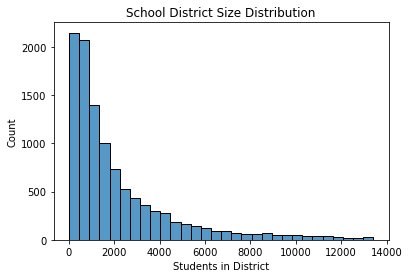

In [3]:
fig = sns.histplot(df['v33'], bins=30, binrange=(0, 10*np.median(df['v33'])))
plt.xlabel("Students in District")
plt.title("School District Size Distribution")
plt.show()

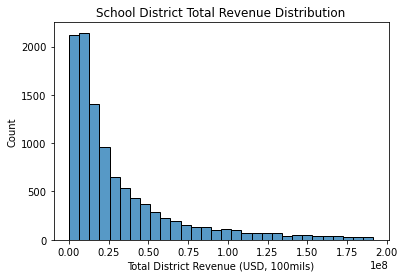

In [4]:
fig = sns.histplot(df['totalrev'], bins=30, binrange=(0, 10*np.median(df['totalrev'])))
plt.xlabel("Total District Revenue (USD, 100mils)")
plt.title("School District Total Revenue Distribution")
plt.show()

In [5]:
df = df[['name', 'stabbr', 'agchrt', 'v33',
         'totalrev', 'tfedrev', 'tstrev', 'tlocrev', 'totalexp', 'tcurelsc', 'tcapout',
         'a11', 'a13', 't06', 't40', 'u30', 
         'v10', 'v12', 'v14', 'v18', 'v24', 'v38', 'v93',
         'v11', 'v13', 'v17', 'v37',
         'z33', 'z35', 'z36', 'z37', 'z38',
         'w01', 'w31', 'w61',
         '_19h', '_21f', '_41f', '_61v', '_66v',
         'graduation rate']]
num_cols = df.drop(columns=['name', 'agchrt', 'stabbr', 'v33', 'graduation rate']).columns

In [6]:
no_pop = df[df['v33'] <= 0].index

df_percap = df.copy()
df_percap.drop(no_pop, inplace=True)

for col in num_cols:
    df_percap[col] = df_percap[col] / df_percap['v33']

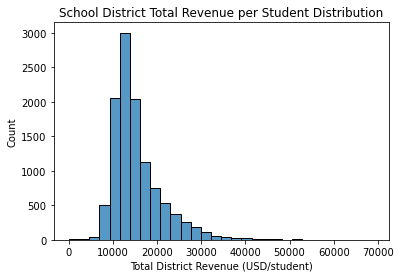

In [7]:
fig = sns.histplot(df_percap['totalrev'], bins=30, binrange=(0, 5*np.median(df_percap['totalrev'])))
plt.xlabel("Total District Revenue (USD/student)")
plt.title("School District Total Revenue per Student Distribution")
plt.show()

In [8]:
df_log = pd.read_csv('../data/log_per_student.csv')
df_log.set_index('leaid', inplace=True)

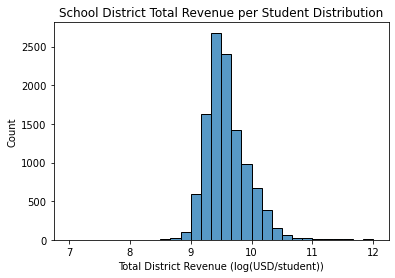

In [9]:
fig = sns.histplot(df_log['totalrev'], bins=30, binrange=(7, 12))
plt.xlabel("Total District Revenue (log(USD/student))")
plt.title("School District Total Revenue per Student Distribution")
plt.show()